In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_index = pd.read_excel(os.path.join("..", "data", "Economic_index.xlsx"))
df_index

Year  Month  Interest_rate  Unemployment_rate  index_price
0   2017     12           2.75                5.3         1464
1   2017     11           2.50                5.3         1394
2   2017     10           2.50                5.3         1357
3   2017      9           2.50                5.3         1293
4   2017      8           2.50                5.4         1256
5   2017      7           2.50                5.6         1254
6   2017      6           2.50                5.5         1234
7   2017      5           2.25                5.5         1195
8   2017      4           2.25                5.5         1159
9   2017      3           2.25                5.6         1167
10  2017      2           2.00                5.7         1130
11  2017      1           2.00                5.9         1075
12  2016     12           2.00                6.0         1047
13  2016     11           1.75                5.9          965
14  2016     10           1.75                5.8          943
15  2016      9           1.75                6.1          958
16  2016      8           1.75                6.2          971
17  2016      7           1.75                6.1          949
18  2016      6           1.75                6.1          884
19  2016      5           1.75                6.1          866
20  2016      4           1.75                5.9          876
21  2016      3           1.75                6.2          822
22  2076      2           1.75                6.2          704
23  2016      1           1.75                6.1          719

In [3]:
# Remove unnecessary columns
df_index.drop(columns = ["Year", "Month"], inplace=True, axis=1)
df_index

Interest_rate  Unemployment_rate  index_price
0            2.75                5.3         1464
1            2.50                5.3         1394
2            2.50                5.3         1357
3            2.50                5.3         1293
4            2.50                5.4         1256
5            2.50                5.6         1254
6            2.50                5.5         1234
7            2.25                5.5         1195
8            2.25                5.5         1159
9            2.25                5.6         1167
10           2.00                5.7         1130
11           2.00                5.9         1075
12           2.00                6.0         1047
13           1.75                5.9          965
14           1.75                5.8          943
15           1.75                6.1          958
16           1.75                6.2          971
17           1.75                6.1          949
18           1.75                6.1          884
19           1.75                6.1          866
20           1.75                5.9          876
21           1.75                6.2          822
22           1.75                6.2          704
23           1.75                6.1          719

In [4]:
# check null values
df_index.isnull().sum()

Interest_rate        0
Unemployment_rate    0
index_price          0
dtype: int64

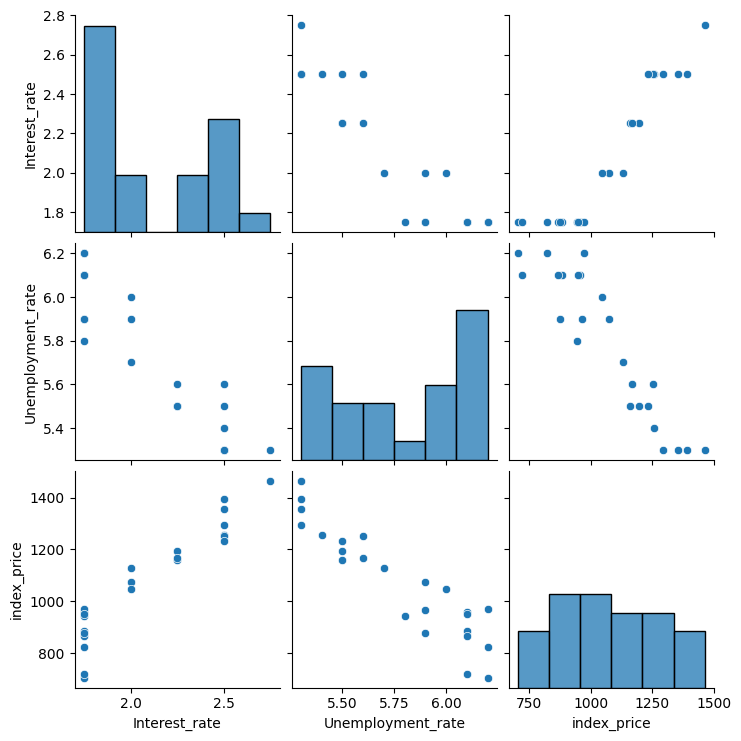

In [5]:
# Data Visualisation
sns.pairplot(df_index)

In [6]:
# Correlation
df_index.corr()

Interest_rate  Unemployment_rate  index_price
Interest_rate           1.000000          -0.925814     0.935793
Unemployment_rate      -0.925814           1.000000    -0.922338
index_price             0.935793          -0.922338     1.000000

Text(0, 0.5, 'index_price')

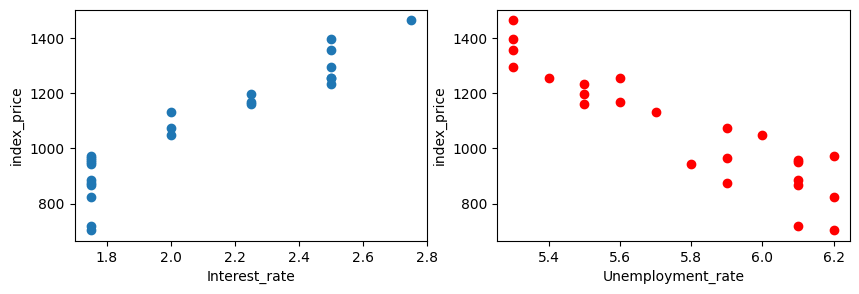

In [7]:
# Visulaise it clearly
plt.figure(figsize= (10,3))
plt.subplot(1,2,1)
plt.scatter(df_index["Interest_rate"], df_index["index_price"])
plt.xlabel("Interest_rate")
plt.ylabel("index_price")
plt.subplot(1,2,2)
plt.scatter(df_index["Unemployment_rate"], df_index["index_price"], color = "Red")
plt.xlabel("Unemployment_rate")
plt.ylabel("index_price")

In [8]:
# dependent and Independent Features
X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]

In [9]:
#traintestsplit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<Axes: xlabel='Unemployment_rate', ylabel='index_price'>

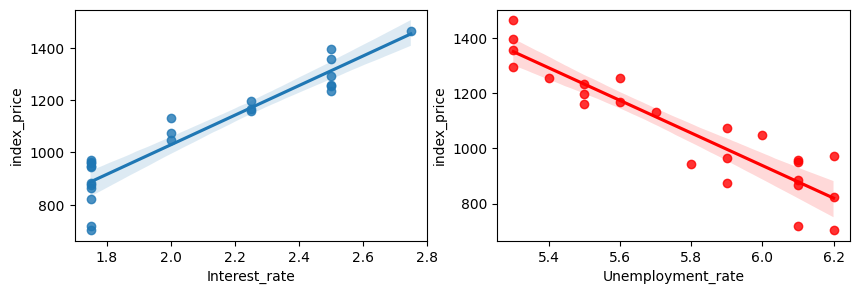

In [10]:
# regression plot
plt.figure(figsize= (10,3))
plt.subplot(1,2,1)
sns.regplot(x = df_index["Interest_rate"], y = df_index["index_price"])
plt.subplot(1,2,2)
sns.regplot(x = df_index["Unemployment_rate"], y = df_index["index_price"], color ="r")

In [11]:
# standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [12]:
# Linear regression Model
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [13]:
# Cross validation
from sklearn.model_selection import cross_val_score
cross_validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv = 3)
np.mean(cross_validation_score)

np.float64(-5914.828180162386)

In [14]:
# PREDICTION
y_pred = regression.predict(X_test)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [15]:
# performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"The Mean absolute error : {mae}")
print(f"The Mean square error : {mse}")
print(f"The root mean square error : {rmse}")

The Mean absolute error : 73.80444932337097
The Mean square error : 8108.567426306604
The root mean square error : 90.04758423359621


In [16]:
# Rsquare
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(f"The R square value : {score}")
adj_r2_score = 1 - ((1 - score) * (len(y_test)-1)/(len(y_test) - X_train.shape[1] -1))
print(f"The Adjusted R square value : {adj_r2_score}")

The R square value : 0.7591371539010257
The Adjusted R square value : 0.5985619231683761


In [22]:
# OLS model
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
predictions_scaled = model.predict(X_test)
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1,2))
predictions

array([[ 46.1854916 , -75.68457999],
       [115.09166705, -64.05886392],
       [-25.42229299,  35.50057468]])

In [23]:
y_test

8     1159
16     971
0     1464
18     884
11    1075
9     1167
Name: index_price, dtype: int64

In [24]:
model.summary()

C:\Users\mohamea2\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 02 Jan 2025   Prob (F-statistic):                       0.754
Time:                        09:45:23   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
regression.coef_

array([  88.27275507, -116.25716066])